# Project: Gather, Wrangle and Analyze Dog Rating Tweets

### Introduction:
The base dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.  WeRateDogs has over 4 million followers and has received international media coverage.

The Twitter archive is great, but it only contains very basic tweet information; retweet count and favorite count are two of the notable column omissions. I queried this additional data from Twitter's API.

Also, I got access to a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction(done by running every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs)

### Data Description
After, wrangling and merging the three tables, The new dataset contains the following variables:

| Variable               | Description                                                                                                                                          |
| -----------            | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
|tweet_id                | unique identifier extracted from the url 
                                                 |
|text                    | text extracted from the tweet. sometimes contains the ratings
                                                 |
|rating_numerator        | this number is usually above the constant denominator (10); it's peculiar to @Weratedogs .
                                                 |
|rating_denominator      | this number is usually constant (10)
                                                 |
|name                    | name of the dog where mentioned
                                                 |
|jpg_url                 | web link to the image of the dog
                                                 |
|favorite_count          | how many times the dog's picture were liked
                                                 |
|retweet_count           | how many times the dog's picture were retweeted
                                                 |
|created_at              | date and time the tweet was made
                                                 |
|dog_stage               | where indicated, this is the age group of the dog and one of doggo, floofer, pupper and puppo 
                                                 |
|dog_breed               | the breed of the dog
                                     ,           |
|

In [5]:
# install and import all neccesary libraries
!pip install tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy #twitter api
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

     ------------------------------------ 101.6/101.6 kB 419.3 kB/s eta 0:00:00
     ------------------------------------ 151.7/151.7 kB 565.8 kB/s eta 0:00:00


## Data Gathering

In [ ]:
ratings_df = pd.read_csv('twitter-archive-enhanced.csv')
ratings_df.head()

I deployed the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_content = requests.get(url)

cwd = os.getcwd() # get the current directory

#Write the file to the working directory
with open(os.path.join(cwd,url.split('/')[-1]) ,mode = 'wb') as file:
    file.write(image_content.content)
    
images_df = pd.read_csv('image-predictions.tsv', sep='\t')
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


I used the Tweepy library to query additional data via the Twitter API and saved it as tweet_json.txt

In [4]:
# # The entire code block was commented out to prevent overwriting the  tweet_json.txt
# twitter_keys = {
#                     'consumer_key':        'HIDDEN',
#                     'consumer_secret':     'HIDDEN',
#                     'access_token_key':    'HIDDEN',
#                     'access_token_secret': 'HIDDEN'
#                }


# #Setup access to API
# auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
# auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# tweet_ids=ratings_df.tweet_id.values


# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 742
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Succe

Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [4]:
#Confirm that the data has been read in to the tweet_json.txt specified
os.listdir()

['twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'act_report.ipynb',
 'tweet_json.txt',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb']

In [5]:
# Load the saved json file to a list to be converted to a dataframe subsequently
tweets_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as tweetfile:
    for line in tweetfile:
        data = json.loads(line)
        tweets_list.append(data)

#Convert the list to a dataframe       
tweets_df=pd.DataFrame(tweets_list)
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",32861,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,6861,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",28382,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5169,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21332,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3411,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",35824,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7074,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",34248,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,7578,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data


### Quality issues


1. Some entries (181) are retweets: Assessed visually and also programmatically by the code block:  ratings_df.loc[~((ratings_df.retweeted_status_id.isnull()) |(ratings_df.retweeted_status_user_id.isnull()))]



2. Some tweets doesn't have corresponding images. Assessed programmatically by checking the number of rows in the archive dataframe: ratings_df.shape[0] and checking the number of rows in the image prediction dataframe: images_df.shape[0]



3. Some ratings are not dog ratings e.g. tweet IDs(849336543269576000,862096992088072000, etc. Assessed visually and also programmatically by the code block:  ratings_df.loc[(ratings_df.text.str.contains("Please don't")) | (ratings_df.text.str.contains('We only'))|(ratings_df.text.str.contains('Please stop'))]



4. Inconsistent naming: The id column in the third dataframe: tweets_df holds the same values as the tweet_id column  in the other two dataframes. Assessed visually



5. Not applicable entries or missing entries in the dog categories are erroneously assigned the string 'None' which is different from the type None or np.nan. Assessed programatically by applying the value_counts() method on each category



6. Inconsistent naming: The full_text column in the third dataframe: tweets_df contains the same values as the text column in the first dataframe: ratings_df. Assessed visually and also programmatically by comparing tweets_df.full_text.head() with ratings_df.text.head()



7. Duplication of entries in the first dataframe:ratings_df; IDs 775096608509886464 and 740373189193256964 seem to refer to the same dog. Assessed visually after running  the following code: ratings_df.loc[ratings_df.rating_denominator >10]



8. Some numerators ratings are 0 which seem to suggest that they might not be dog's ratings. Assessed programatically by ratings_df.rating_numerator.eq(0).any() which returned True and then ratings_df[ratings_df.rating_numerator.eq(0)]

### Tidiness issues

1. There should be only one table instead of three and too many superfluous columns 


2. Dog stages spread across four columns instead of a column


3. A column should indicate the dog breed based on the magnititude of the confidence

In [6]:
# Make copies of original pieces of data
ratings_clean = ratings_df.copy()
images_clean = images_df.copy()
tweets_clean = tweets_df.copy()

## Cleaning Data: Quality Issues

### Issue #1: 181 entries are retweets

#### Define: retweets are identified by records that contains values on either or both of the retweeted_status_id and retweeted_status_user_id columns. Records with empty (null) values in the columns would be extracted

#### Code

In [7]:
#check out the retweets
ratings_clean.loc[~((ratings_clean.retweeted_status_id.isnull()) |(ratings_clean.retweeted_status_user_id.isnull()))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [8]:
#Filter out the records that contains values in the indicated columns
ratings_clean =ratings_clean.loc[(ratings_clean.retweeted_status_id.isnull()) |(ratings_clean.retweeted_status_user_id.isnull())]

#### Test

In [9]:
ratings_clean.loc[~((ratings_clean.retweeted_status_id.isnull()) |(ratings_clean.retweeted_status_user_id.isnull()))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Some tweets doesn't have corresponding images

#### Define: only tweet_ids present in the second dataframe (image_prediction) should be retained in the first dataframe. Merge the two dataframes to retain only the tweet_ids common to both dataframe

#### Code

In [10]:
ratings_clean = pd.merge(ratings_clean, images_clean, on= 'tweet_id')

#### Test

In [11]:
ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

### Issue #3: Some ratings are not dog ratings

#### Define: most non-dog records usually contains either of  the phrases 'we only' , 'please don't', 'get sent', or 'please stop'. Check out the records that contains the phrases and drop them if need be

#### Code

In [12]:
#Check out the phrases
ratings_clean.loc[(ratings_clean.text.str.contains("Please don't")) |(ratings_clean.text.str.contains("please don't")) |(ratings_clean.text.str.contains('We only'))|(ratings_clean.text.str.contains('we only'))|(ratings_clean.text.str.contains('Please stop')) |(ratings_clean.text.str.contains('please stop')) | (ratings_clean.text.str.contains('get sent'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
24,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,...,1,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
52,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,...,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
55,880095782870896641,NaN,NaN,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880095782...,...,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True
74,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,...,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True
77,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562...,...,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
103,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,...,1,Labrador_retriever,0.522644,True,kuvasz,0.332461,True,dalmatian,0.032008,True
106,867051520902168576,NaN,NaN,2017-05-23 16:16:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,...,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
113,864873206498414592,NaN,NaN,2017-05-17 16:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in Jesus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864873206...,...,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
124,862096992088072192,NaN,NaN,2017-05-10 00:08:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send perfectly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862096992...,...,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True
135,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False


In [13]:
#drop the records that contains the phrases
ratings_clean =ratings_clean.loc[~((ratings_clean.text.str.contains("Please don't")) |(ratings_clean.text.str.contains("please don't")) |(ratings_clean.text.str.contains('We only'))|(ratings_clean.text.str.contains('we only'))|(ratings_clean.text.str.contains('Please stop')) |(ratings_clean.text.str.contains('please stop')) | (ratings_clean.text.str.contains('get sent')))]

#### Test

In [14]:
ratings_clean.loc[(ratings_clean.text.str.contains("Please don't")) |(ratings_clean.text.str.contains("please don't")) |(ratings_clean.text.str.contains('We only'))|(ratings_clean.text.str.contains('we only'))|(ratings_clean.text.str.contains('Please stop')) |(ratings_clean.text.str.contains('please stop')) | (ratings_clean.text.str.contains('get sent'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #4: Inconsistent naming: The id column in the third dataframe: tweets_df holds the same values as the tweet_id column  in the other two dataframes. Assessed visually

#### Define:  Rename the id column in tweets_clean to tweet_id

#### Code

In [15]:
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [16]:
tweets_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [17]:
tweets_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

### Issue #5: Not applicable entries or missing entries in the dog categories are erroneously assigned the string 'None' which is different from the type None or np.nan

#### Define: Convert the text string 'None' in the four dog categories to np.nan values 

#### Code

In [18]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    ratings_clean[col]=ratings_clean[col].replace ('None', np.nan)

#### Test

In [19]:
for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    print(ratings_clean[col].value_counts())
    print('\n')

doggo    73
Name: doggo, dtype: int64


floofer    8
Name: floofer, dtype: int64


pupper    211
Name: pupper, dtype: int64


puppo    23
Name: puppo, dtype: int64




### Issue #6: Inconsistent naming: The full_text column in the third dataframe: tweets_df contains the same values as the text column in the first dataframe: ratings_df

#### Define: rename the full_text column in the tweets_clean dataframe to text 

#### Code

In [20]:
tweets_clean.rename(columns={'full_text': 'text'}, inplace=True)

#### Test

In [21]:
tweets_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited', 'text',
       'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [22]:
tweets_clean.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

### Issue #7: Duplication of entries in the first dataframe ratings_df; tweet ids 775096608509886464 and 740373189193256964 seem to refer to the same dog. 

#### Define: compare the two ids and drop them if they are the same

#### Code

In [23]:
ratings_clean.loc[(ratings_clean.tweet_id == 775096608509886464) |(ratings_clean.tweet_id == 740373189193256964)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


It seems the first record has been dropped in previous operations but let's test using the original dataframe

#### Test

In [24]:
ratings_df.loc[(ratings_df.tweet_id == 775096608509886464) |(ratings_df.tweet_id == 740373189193256964)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


The first record had indeed been dropped by a merger operation. A closer inspection of the expanded_urls (from where the tweet_id is derived) will show that they are indeed duplicates

### Issue #8: Some numerators ratings are 0 which seem to suggest that they might not be dog's ratings

#### Define: Check the records where numerators ratings are 0 and drop them if need be

#### Code

In [25]:
#turn off column with to prevent truncation of text
pd.set_option('display.max_colwidth', -1)

(ratings_clean
     #locate records with values of 0 in the ratings_numerator column
     .loc[ratings_clean.rating_numerator.eq(0)] 
     #locate the text column of the records above
     .loc[:, 'text']
)

235    When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
756    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

In [26]:
#From the output above, it seems that they are not valid dog ratings and should be dropped
ratings_clean =ratings_clean.loc[~(ratings_clean.rating_numerator.eq(0))]

#### Test

In [27]:
ratings_clean.loc[ratings_clean.rating_numerator.eq(0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Cleaning Data: Tidiness Issues

### Issue #1: There should be only one table instead of three and too many superfluous columns 

#### Define: Drop the unnecessary columns in each dataframe and append it to the ratings_clean dataframe

#### Code

In [28]:
#check out the columns in ratings_clean dataframe(which has already been merged with the images prediction dataframe)
ratings_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

drop the following columns: 
 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
 'retweeted_status_id', 'retweeted_status_user_id' 'retweeted_status_timestamp','expanded_urls' 'img_num', 'p1_conf', 'p2_conf', 'p3', 'p3_dog'

In [29]:
ratings_clean=ratings_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'])

In [30]:
#check out the columns in tweets_clean dataframe
tweets_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited', 'text',
       'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

Select the following columns and drop others
'created_at', 'favorite_count', 'text', 'tweet_id','retweet_count'

In [31]:
tweets_clean=tweets_clean.loc[:, ['tweet_id',  'text',  'favorite_count','retweet_count','created_at']]

In [32]:
#merge the two dataframes
ratings_clean =pd.merge(ratings_clean, tweets_clean, on=['tweet_id',  'text'])

#### Test

In [33]:
ratings_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_count,retweet_count,created_at
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False,32861,6861,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True,28382,5169,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True,21332,3411,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False,35824,7074,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True,34248,7578,Sat Jul 29 16:00:24 +0000 2017


### Issue #2: Dog stages spread across four columns instead of a column

#### Define: Create a single column: dog_stage that will indicate the dog stage if indicated

#### Code

In [34]:
#Create a dog_stage category with an empty value
ratings_clean['dog_stage'] =np.nan

#Create a temporary dataframe comprising the four dog stages columns and the newly created dog_stage column
dog_stage_frame = ratings_clean.loc[:,['doggo','floofer','pupper','puppo','dog_stage']]


#Create a temporary list
temp_lst = []

# iterate row-wise in the temporary dataframe
for row in dog_stage_frame.iterrows():
    # test if all values in row are the same (1 = no)
    if row[1].nunique() == 1:
        # if different, find the one that is the string and append to list
        a,b,c,d,e, = row[1] # *this is specific to your example with three cols*
        for i in [a,b,c,d,e]:
            if isinstance(i,str):
                temp_lst.append(i)
    else:
        # if same append specified value to list
        temp_lst.append('not_indicated') #to mean that no stage was specified in the tweet

#Replace the dog_stage column in the dataframe with the newly parsed list
ratings_clean['dog_stage'] = temp_lst

In [35]:
#check the dataframe
ratings_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_count,retweet_count,created_at,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False,32861,6861,Tue Aug 01 16:23:56 +0000 2017,not_indicated
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True,28382,5169,Tue Aug 01 00:17:27 +0000 2017,not_indicated
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True,21332,3411,Mon Jul 31 00:18:03 +0000 2017,not_indicated
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False,35824,7074,Sun Jul 30 15:58:51 +0000 2017,not_indicated
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True,34248,7578,Sat Jul 29 16:00:24 +0000 2017,not_indicated


In [36]:
#check that the total value_counts in the dog_stage columns adds up to 1925(the number of entries)
ratings_clean.dog_stage.value_counts()

not_indicated    1631
pupper           203 
doggo            62  
puppo            22  
floofer          7   
Name: dog_stage, dtype: int64

In [37]:
#drop the superfluous columns
ratings_clean=ratings_clean.drop(columns=['doggo', 'floofer', 'pupper','puppo'])

#### Test

In [38]:
ratings_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_dog,p2,p2_dog,p3,p3_dog,favorite_count,retweet_count,created_at,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,bagel,False,banana,False,32861,6861,Tue Aug 01 16:23:56 +0000 2017,not_indicated
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,True,28382,5169,Tue Aug 01 00:17:27 +0000 2017,not_indicated
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,True,21332,3411,Mon Jul 31 00:18:03 +0000 2017,not_indicated
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,False,35824,7074,Sun Jul 30 15:58:51 +0000 2017,not_indicated
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,English_springer,True,German_short-haired_pointer,True,34248,7578,Sat Jul 29 16:00:24 +0000 2017,not_indicated


### Issue #3: A column should indicate the dog breed based on the magnititude of the confidence

#### Define: Create a column that will identify the possible breed of the dog based on the prediction algorithm(ranked by confidence ) and drop the superflous columns

#### Code

In [39]:
ratings_clean['dog_breed'] = (
    np.where(
                #select the first predicted breed if the value is a dog breed
                ratings_clean['p1_dog'] == True,  
                ratings_clean['p1'],
                #select the second predicted breed if the value is a dog breed
                np.where(
                            ratings_clean['p2_dog'] == True,
                            ratings_clean['p2'],
                            #select the final predicted breed if the value is a dog breed, otherwise return 'unidentified'
                            np.where(
                                        ratings_clean['p3_dog'] == True, ratings_clean['p3'], 'unidentified')))
)


In [40]:
#drop the other columns: 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'
ratings_clean.drop(columns=['p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'], inplace=True)

#### Test

In [41]:
ratings_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,created_at,dog_stage,dog_breed
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,32861,6861,Tue Aug 01 16:23:56 +0000 2017,not_indicated,unidentified
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,28382,5169,Tue Aug 01 00:17:27 +0000 2017,not_indicated,Chihuahua
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21332,3411,Mon Jul 31 00:18:03 +0000 2017,not_indicated,Chihuahua
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,35824,7074,Sun Jul 30 15:58:51 +0000 2017,not_indicated,Labrador_retriever
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,34248,7578,Sat Jul 29 16:00:24 +0000 2017,not_indicated,basset


In [42]:
ratings_clean.dog_breed.value_counts()

unidentified                   302
golden_retriever               155
Labrador_retriever             100
Pembroke                       92 
Chihuahua                      89 
pug                            59 
toy_poodle                     50 
chow                           45 
Pomeranian                     42 
Samoyed                        38 
malamute                       32 
Chesapeake_Bay_retriever       29 
cocker_spaniel                 29 
French_bulldog                 28 
miniature_pinscher             23 
Eskimo_dog                     22 
German_shepherd                21 
Cardigan                       21 
Shih-Tzu                       20 
beagle                         20 
Staffordshire_bullterrier      20 
Siberian_husky                 20 
Maltese_dog                    19 
Shetland_sheepdog              19 
Rottweiler                     19 
kuvasz                         18 
Lakeland_terrier               18 
basset                         17 
Italian_greyhound   

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
ratings_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
#copy the ratings_clean dataframe
viz_df = ratings_clean.copy()
viz_df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,created_at,dog_stage,dog_breed
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,32861,6861,Tue Aug 01 16:23:56 +0000 2017,not_indicated,unidentified
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,28382,5169,Tue Aug 01 00:17:27 +0000 2017,not_indicated,Chihuahua
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21332,3411,Mon Jul 31 00:18:03 +0000 2017,not_indicated,Chihuahua
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,35824,7074,Sun Jul 30 15:58:51 +0000 2017,not_indicated,Labrador_retriever
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,34248,7578,Sat Jul 29 16:00:24 +0000 2017,not_indicated,basset


In [67]:
dog_breed = (viz_df
             #group the data
             .groupby('dog_breed')['favorite_count', 'retweet_count', 'tweet_id']
             #perform aggregations
             .agg({'favorite_count': 'mean', 'retweet_count': 'mean', 'tweet_id':'count'}) 
             #chop off the decimal places
             .astype(int) 
             #rename the tweet_id column to something more appropriate
             .rename(columns={'tweet_id': 'dog_count'})
             #sort by favorite_count and then retweet_count           
             .sort_values(['favorite_count', 'retweet_count'], ascending=False)
             .reset_index() #reset index
            )
dog_breed.head(10)

,dog_breed,favorite_count,retweet_count,dog_count
0,Bedlington_terrier,24383,7636,5
1,Saluki,20189,4040,4
2,French_bulldog,17687,4503,28
3,Bouvier_des_Flandres,14924,3509,1
4,Afghan_hound,14272,4689,3
5,black-and-tan_coonhound,14207,3245,2
6,Irish_water_spaniel,13569,3529,3
7,standard_poodle,12405,4726,10
8,whippet,12336,4016,11
9,Leonberg,12301,3016,3


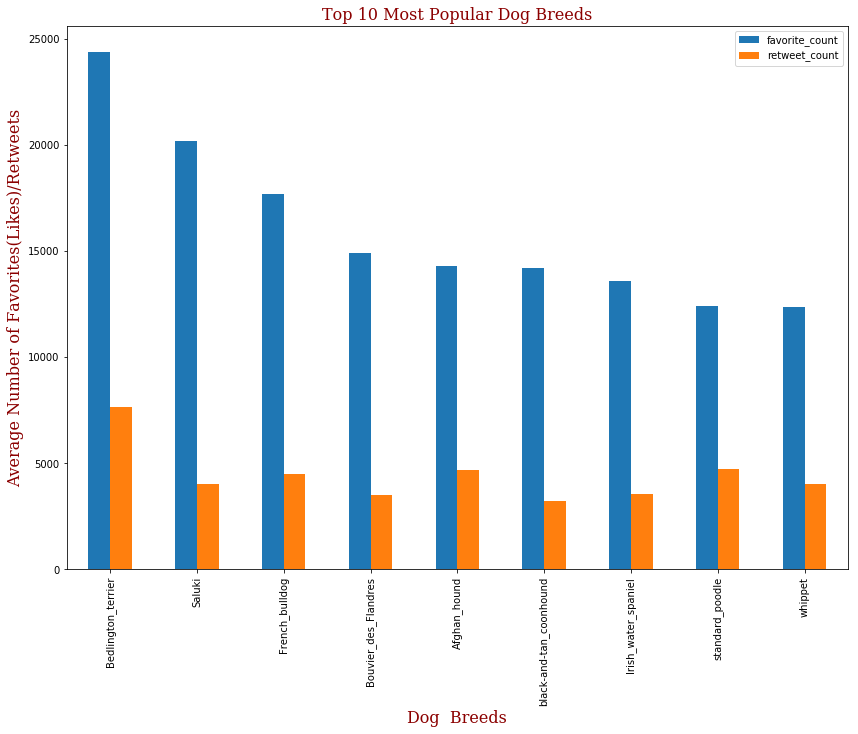

In [129]:
#select the top 10 popular dogs
top10 =(dog_breed
            .iloc[0:9]
            .drop(columns=['dog_count'])
            .set_index('dog_breed')
            .plot(kind='bar',figsize=(14,10))
       )
#Make the plot fancier
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.title('Top 10 Most Popular Dog Breeds', fontdict=font)
plt.xlabel('Dog  Breeds', fontdict=font)
plt.ylabel('Average Number of Favorites(Likes)/Retweets', fontdict=font)
plt.savefig('popular_dog_breeds', dpi=600, bbox_inches='tight');

#### It seems bedlington_terrier dogs are most loved as they got a higher number of retweets and likes(favorites) than other breeds


In [83]:
#Convert the created_at column to datetime
viz_df.created_at =pd.to_datetime(viz_df.created_at)
viz_df.created_at.dtype

dtype('<M8[ns]')

In [86]:
#Extract the day created
viz_df['day_created'] = viz_df.created_at.dt.strftime('%A')
viz_df.head(3)

,tweet_id,text,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,created_at,dog_stage,dog_breed,day_created
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,32861,6861,2017-08-01 16:23:56,not_indicated,unidentified,Tuesday
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,28382,5169,2017-08-01 00:17:27,not_indicated,Chihuahua,Tuesday
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,21332,3411,2017-07-31 00:18:03,not_indicated,Chihuahua,Monday


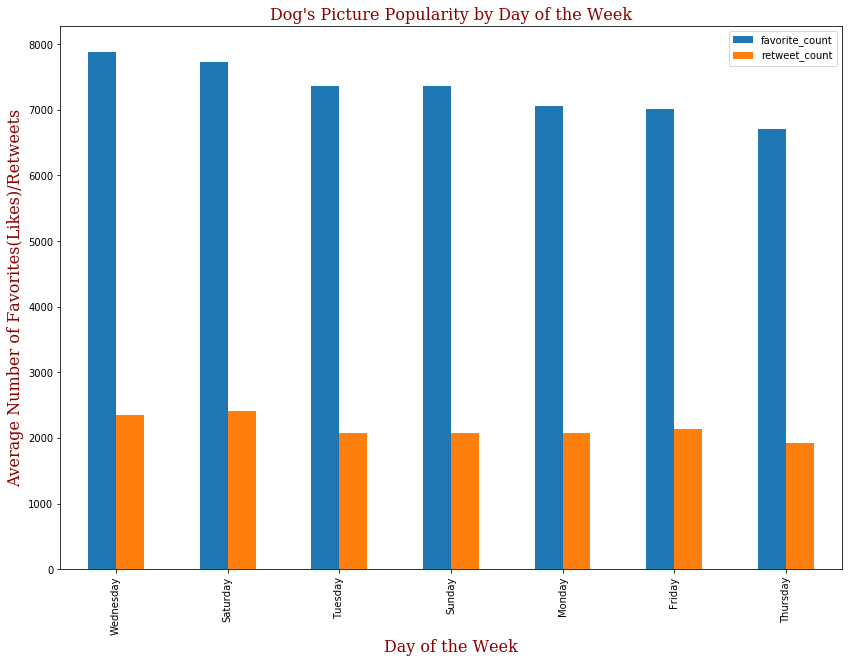

In [130]:
top_day =(viz_df
              #group the data
             .groupby('day_created')['favorite_count', 'retweet_count']
             #perform aggregations
             .mean() 
             #chop off the decimal places
             .astype(int) 
             #sort by favorite_count and then retweet_count           
             .sort_values(['favorite_count', 'retweet_count'], ascending=False)
             .plot(kind='bar',figsize=(14,10))
       )
#Make the plot fancier
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.title("Dog's Picture Popularity by Day of the Week", fontdict=font)
plt.xlabel('Day of the Week', fontdict=font)
plt.ylabel('Average Number of Favorites(Likes)/Retweets', fontdict=font)
plt.savefig('popular_day', dpi=600, bbox_inches='tight');

#### Even though there not much differences, pictures sent in (or rated) on a Wednesday or a Saturday got more likes and retweets, Now I know when to send in my pictures :)

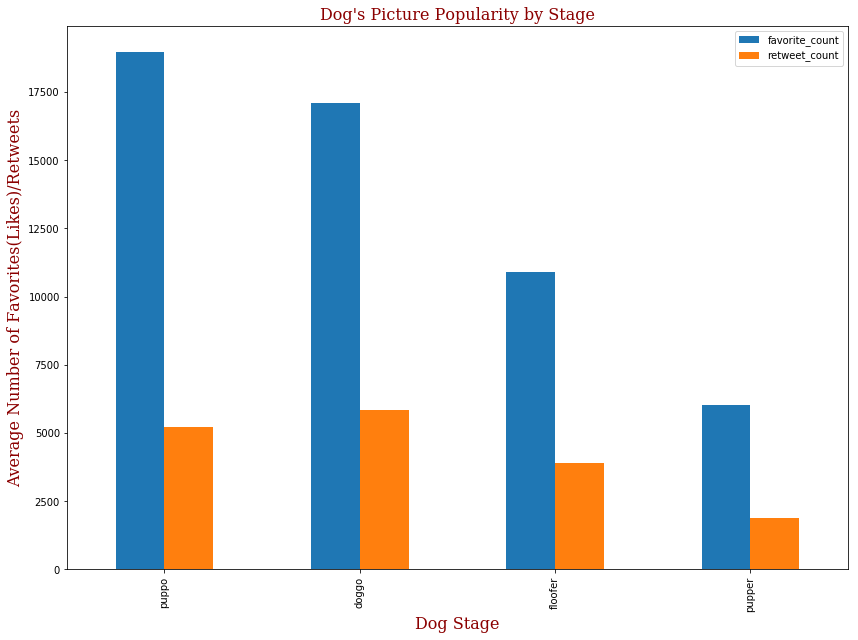

In [131]:
dog_stage =(viz_df
              #group the data
             .groupby('dog_stage')['favorite_count', 'retweet_count']
             #perform aggregations
             .mean() 
             #chop off the decimal places
             .astype(int) 
             #sort by favorite_count and then retweet_count           
             .sort_values(['favorite_count', 'retweet_count'], ascending=False)
             #drop 'not_indicated' values
             .drop(['not_indicated'],axis=0)
             .plot(kind='bar',figsize=(14,10))
       )

#Make the plot fancier
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.title("Dog's Picture Popularity by Stage", fontdict=font)
plt.xlabel('Dog Stage', fontdict=font)
plt.ylabel('Average Number of Favorites(Likes)/Retweets', fontdict=font)
plt.savefig('popular_stage', dpi=600, bbox_inches='tight');

#### Puppo and Doggo are seemingly the most popular stages. But of course, who doesn't like a pup?